In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg as la

In [2]:
%matplotlib notebook

## Problem 1

Use the `FuncAnimation` class to animate the function $y = sin(x + \frac{t}{10})$ where $x \in [0, 2\pi]$, and t ranges from 0 to 100 seconds. (Hint: Each frame of the animation will be a plot of $sin(x + 0.1t_i)$, where $t_i$ is the $i$th value of time for some array of time values).

<IPython.core.display.Javascript object>


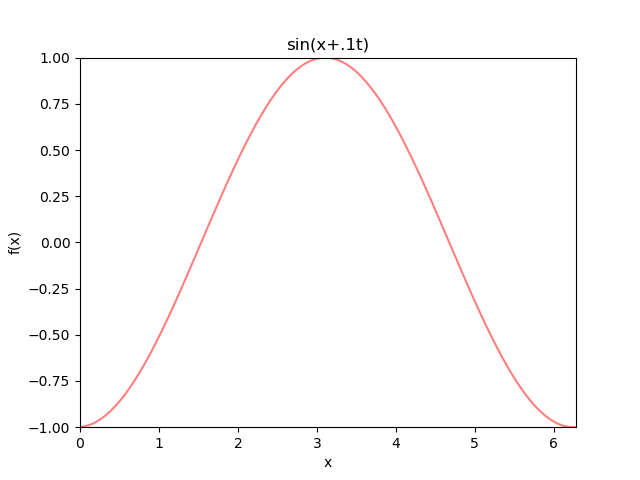

In [3]:
#Set initial data
t = np.linspace(0,100,100)
x = np.linspace(0,2*np.pi, 100)
y = np.sin(x+.1*t)

#Set plot information
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlim((0,2*np.pi))
ax.set_ylim((-1,1))
plt.title("sin(x+.1t)")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

#Get trajectory line object
traj, = plt.plot([],[], color='r', alpha=0.5)

#Define update function
def update(i):
    traj.set_data(x, np.sin(x+.1*t[i]))
    return traj
#Get animation
ani = animation.FuncAnimation(fig,update,frames=range(100),interval=25)
plt.show()

## Problem 2

The orbits for Mercury, Venus, Earth, and Mars are stored in the file `orbits.npz`. The file contains four NumPy arrays: `mercury`, `venus`, `earth`, and `mars`. The first column of each array contains the x-coordinates, the second column contains the y-coordinates, and the third column contians the z-coordinates, all relative to the Sun, and expressed in AU (astronomical units, the average distance between Earth and the Sun, approximately 150 million
kilometers).

Use `np.load('orbits.npz')` to load the data for the four planets' orbits. Create a 3D plot of the orbits, and compare your results with Figure 1.1.

<IPython.core.display.Javascript object>


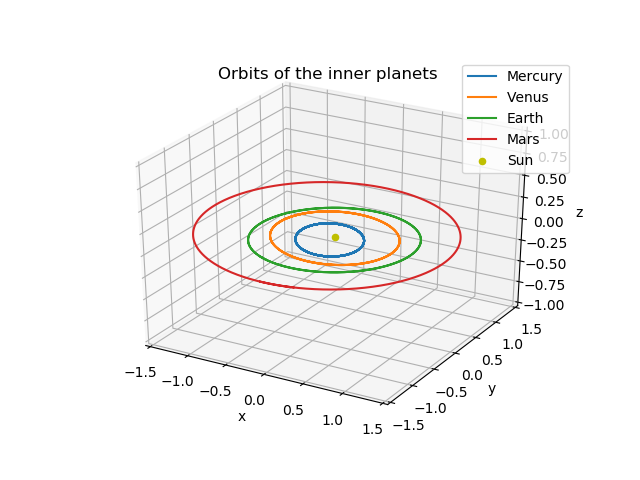

In [8]:
orbits = np.load('orbits.npz')
mercury, venus, earth, mars = orbits['mercury'], orbits['venus'], orbits['earth'], orbits['mars']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim((-1,1))
ax.set_xlim((-1.5,1.5))
ax.set_ylim((-1.5,1.5))
#Plot mercury
ax.plot(mercury[:,0], mercury[:,1], mercury[:,2],label='Mercury')
#Plot venus
ax.plot(venus[:,0], venus[:,1], venus[:,2], label='Venus')
#Plot earth
ax.plot(earth[:,0], earth[:,1], earth[:,2], label='Earth')
#Plot mars
ax.plot(mars[:,0], mars[:,1], mars[:,2], label='Mars')
#Plot sun
ax.scatter(0,0,0, c='y', label='Sun')
#Label and plot
plt.legend()
plt.title('Orbits of the inner planets')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()

## Problem 3

Each row of the arrays in `orbits.npz` gives the position of the planets at a
particular time. The arrays have 1400 points in time over a 700 day period (beginning on 2018-5-30). Create a 3D animation of the planet orbits. Display lines for the trajectories of the orbits and points for the current positions of the planets at each point in time. Your update() function will need to return a list of `Line3D` objects, one for each orbit trajectory and one for each planet position marker. Using `animation.save()`, save your animated plot as "planet_ani.mp4".

To display the mp4 video in the Jupyter Notebook, run the following code in a markdown cell:

`<video src="planet_ani.mp4" controls>`

In [9]:
#Set video write wrapper
animation.writer = animation.writers['ffmpeg']
plt.ioff() 

#Set graph information
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlim((-1,1))
ax.set_xlim((-1.5,1.5))
ax.set_ylim((-1.5,1.5))
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('Orbits of the inner planets')
ax.scatter(0,0,0, c='y', label='Sun')


#Mercury line objects
mercurypos, = plt.plot([],[],[],marker='o',c='blue', label='Mercury')
mercurytraj, = plt.plot([],[],[],c='blue')
#Venus line objects
venuspos, = plt.plot([],[],[],marker='o',c='orange', label='Venus')
venustraj, = plt.plot([],[],[],c='orange')
#Earthe line objects
earthpos, = plt.plot([],[],[],marker='o',c='green', label='Earth')
earthtraj, = plt.plot([],[],[],c='green')
#Mars line objects
marspos, = plt.plot([],[],[],marker='o',c='red', label='Mars')
marstraj, = plt.plot([],[],[],c='red')

#Update function
def update(i):
    #Update mercury line objects
    mercurypos.set_data(mercury[i,0],mercury[i,1])
    mercurypos.set_3d_properties(mercury[i,2])
    mercurytraj.set_data(mercury[:i+1,0], mercury[:i+1,1])
    mercurytraj.set_3d_properties(mercury[:i+1,2])
    #Update venus line objects
    venuspos.set_data(venus[i,0],venus[i,1])
    venuspos.set_3d_properties(venus[i,2])
    venustraj.set_data(venus[:i+1,0], venus[:i+1,1])
    venustraj.set_3d_properties(venus[:i+1,2])
    #Update earth line objects
    earthpos.set_data(earth[i,0],earth[i,1])
    earthpos.set_3d_properties(earth[i,2])
    earthtraj.set_data(earth[:i+1,0], earth[:i+1,1])
    earthtraj.set_3d_properties(earth[:i+1,2])
    #Update mars line objects
    marspos.set_data(mars[i,0],mars[i,1])
    marspos.set_3d_properties(mars[i,2])
    marstraj.set_data(mars[:i+1,0], mars[:i+1,1])
    marstraj.set_3d_properties(mars[:i+1,2])
    
    return mercurypos, mercurytraj, venuspos, venustraj, earthpos, earthtraj, marspos, marstraj

#Get animation and save
plt.legend()
ani = animation.FuncAnimation(fig, update, frames=range(1400), interval=25)
ani.save('JakeCallahan_prob3.mp4')

<video src="JakeCallahan_prob3.mp4" controls>

## Problem 4

Make a surface plot of the bivariate normal density function given by:

$$f(\mathbf{x}) = \frac{1}{\sqrt{det(2\pi\Sigma)}}\exp(-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^{T}\Sigma^{-1}(\mathbf{x}-\mathbf{\mu}))$$

Where $\mathbf{x} = [x,y]^T \in \mathbb{R}^2$, $\mathbf{\mu} = [0,0]^T$ is the mean vector, and: $$\Sigma = \begin{bmatrix} 1 & 3/5 \\ 3/5 & 2 \end{bmatrix}$$ is the covariance matrix.

(Hint: Rewrite $f$ as a function of $x$ and $y$, expanding the matrix-vector products inside the exponential. Then evaluate your function on the meshgrid corresponding to $(x,y) \in [-5,5] \times [-5,5]$).

In [ ]:
#Set initial variables
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
A = np.dstack((X,Y))
#Calculate sigma
e = np.array([[1,3/5],[3/5,2]])
e_det = la.det(2*np.pi*e)
e_inv = la.inv(e)
Z = np.ones_like(X)
#Set values of Z
for i in range(100):
    for j in range(100):
        Z[i,j] = (1/e_det**(1/2))*np.exp(-1/2*np.reshape((A[i,j,:]),(1,2)) @ (e_inv).dot(np.reshape((A[i,j,:]),(2,1))))

#Set graph settings
fig = plt.figure()
ax.set_ylim(-5,5)
ax.set_xlim(-5,5)
ax.set_zlim(0,.12)
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap='inferno')
#Plot
plt.title("Bivariate Normal PDF")
ax.set_xlabel("x")
ax.set_ylabel('y')
ax.set_zlabel('f(x)')
plt.show()                                  


## Problem 5

Use the data in vibration.npz to produce a surface animation of the solution
to the wave equation for an elastic rectangular membrane. Save the animation as `vibration.mp4`. The file contains three NumPy arrays: `X`, `Y`, `Z`. `X` and `Y` are meshgrids of shape `(300,200)` corresponding to 300 points in
the y-direction and 200 points in the x-direction, all corresponding to a 2x3 rectangle with one corner at the origin. `Z` is of shape `(150,300,200)`, giving the height of the vibrating membrane at each (x,y) point for 150 values of time. In the language of partial differential equations, this is the solution to the following intital/boundary value problem for the wave equation:

$$u_{tt} = 6^2(u_{xx}+u_{yy})$$
$$(x,y) \in [0,2]\times[0,3],t \in [0,5]$$
$$u(t,0,y)=u(t,2,y)=u(t,x,0)=u(t,x,3) = 0$$
$$u(0,x,y) = xy(2-x)(3-y)$$

In [10]:
#Set write settings
animation.writer = animation.writers['ffmpeg']
plt.ioff()

#Load in and store data
data = np.load('vibration.npz')
X = data['X']
Y = data['Y']
Z = data['Z']

#Set graph info
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim((-.1,2))
ax.set_ylim((-.1,3))
ax.set_zlim((-4.5,4.5))

#Update surface
def update(i):
    ax.clear()
    ax.set_xlim((-.1,2))
    ax.set_ylim((-.1,3))
    ax.set_zlim((-4.5,4.5))
    ax.plot_surface(X,Y,Z[i], cmap='inferno')
    ax.set_title('Vibration Animation')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    return

#Get and save animation
ani = animation.FuncAnimation(fig, update, frames=range(150), interval=25)
ani.save('JakeCallahan_prob5.mp4')



<video src="JakeCallahan_prob5.mp4" controls>